In [33]:
import tensorflow as tf
import numpy as np
import pandas as pd

# import plotting libraries
import matplotlib.pyplot as plt
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
from IPython.display import display

# model visualization library
from tensorflow.keras.utils import plot_model

# data - preprocessing libs
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler,StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split

random_seed=42

In [34]:
# reading the csv data using pandas
dataset=pd.read_csv('dataset.csv')
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


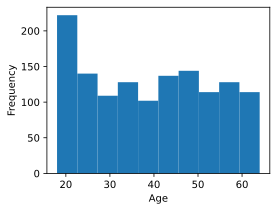

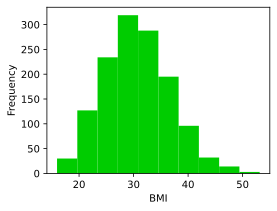

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [35]:
# data visulization:
dataset["age"].plot(kind="hist",xlabel='Age',ylabel='Frequency',figsize=(4,3))
plt.show()
dataset["bmi"].plot(kind="hist",xlabel='BMI',ylabel='Frequency',figsize=(4,3),color=(0,0.8,0))
plt.show()
dataset['children'].value_counts()

### 2. Preprocessing:

In [39]:
# create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(),["age","bmi","children"]), # Normalize the values in columns between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"),["sex","smoker","region"])
)

# creating features and labels (X,y)
X=dataset.drop("charges",axis=1)
y=dataset.drop(X.columns,axis=1)


# creating training and test sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=random_seed)


# fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScalar) and OneHotEncoder
X_train_p=ct.transform(X_train)
X_test_p=ct.transform(X_test)

In [49]:
X_train.shape,X_train_p.shape

((1070, 6), (1070, 11))

**Details after pre-processing**
* Total input features: 11 <br>
    X = ['age', 'bmi', 'children', 'sex_female', 'sex_male', 'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest','region_southeast', 'region_southwest']
* Total output features: 1 <br>
    y = ['charges']

**Note:** 
* We don't need to convert it to tensors as pandas is built on numpy, and tensorflow also, hence it excepts them as it is

### 3. Building the neural network for regression:

In [50]:
# setting the random seed
tf.random.set_seed(random_seed)

**Model 1**

/home/rudraksha14/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


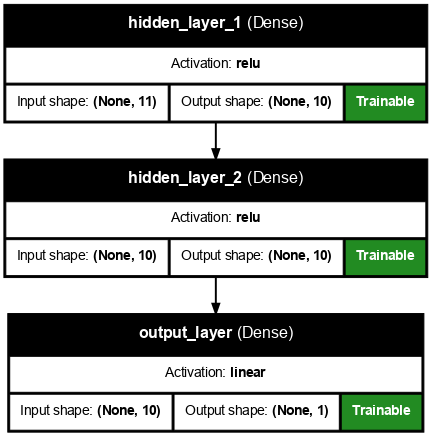

Model: "model_mcp_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 10)             │           120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 241 (964.00 B)

 Trainable params: 241 (964.00 B)

 Non-trainable params: 0 (0.00 B)

None

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 298957056.0000 - mse: 298957056.0000   
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 123896432.0000 - mse: 123896432.0000
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 68992960.0000 - mse: 68992960.0000 
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 40340052.0000 - mse: 40340052.0000 
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 38708460.0000 - mse: 38708460.0000 
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 37915844.0000 - mse: 37915844.0000 
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 37379864.0000 - mse: 37379864.0000 
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 36819592.0000 - mse: 36819592.0000 
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 36325912.0000 - mse: 36325912.0000 
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 35630000.0000 - mse: 35630000.0000
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2m

In [56]:
# hyperparams:
learning_rate=0.1
epochs=100

# creating the model:
model1=tf.keras.Sequential(name="model_mcp_1")

# adding 2 hidden layers (each with 10 neurons) and output layer with 1 neuron
model1.add(tf.keras.layers.Dense(10,input_shape=[11],activation='relu',name='hidden_layer_1'))
model1.add(tf.keras.layers.Dense(10,activation='relu',name='hidden_layer_2'))
model1.add(tf.keras.layers.Dense(1,name='output_layer'))

# compiling the model
model1.compile(
    loss='mse',
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
    metrics=['mse']
)

# visulize model and get summary

display(plot_model(
    model=model1,
    show_dtype=False,
    show_shapes=True, 
    rankdir='TB',  # 'TB' for top-to-bottom layout, 'LR' for left-to-right
    show_layer_names=True,  # Optional: Shows layer names
    dpi=70,  # Reduce DPI to make it smaller
    expand_nested=True,  # Optional: Expands nested models if present
    show_layer_activations=True,
    show_trainable=True,
    # to_file='model.png' # File name of the plot image,
))

display(model1.summary())

# fitting the model
history1 = model1.fit(X_train_p,y_train,epochs=epochs)

MAE loss: 3132.203125


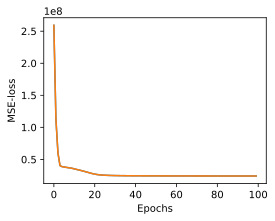

In [63]:
# Evaluating model1:
# plot history (loss curve or training curve)
pd.DataFrame(history1.history).plot(figsize=(4,3),xlabel="Epochs",ylabel="MSE-loss",legend=False);

# evaluating using MAE:
print(f"MAE loss: {tf.metrics.mae(tf.squeeze(y_test),tf.squeeze(model1.predict(X_test_p,verbose=0))).numpy()}")


**Conclusion: Our current model is not performing too well, it needs improvements**

**Model 2**

/home/rudraksha14/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


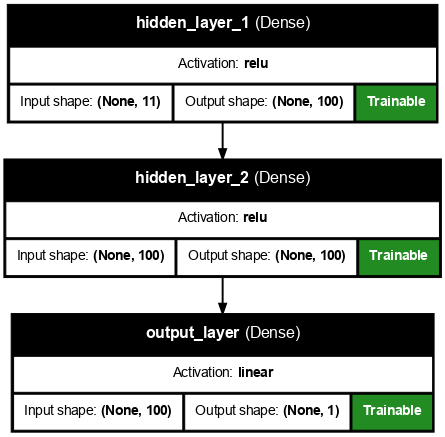

Model: "model_mcp_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 100)            │         1,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,401 (44.54 KB)

 Trainable params: 11,401 (44.54 KB)

 Non-trainable params: 0 (0.00 B)

None

Epoch 1/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 228540304.0000 - mse: 228540304.0000  
Epoch 2/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 45491684.0000 - mse: 45491684.0000
Epoch 3/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 41349900.0000 - mse: 41349900.0000
Epoch 4/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 40503768.0000 - mse: 40503768.0000 
Epoch 5/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 38446472.0000 - mse: 38446472.0000 
Epoch 6/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 36689896.0000 - mse: 36689896.0000
Epoch 7/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 34593936.0000 - mse: 34593936.0000
Epoch 8/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32405404.0000 - mse: 32405404.0000 
Epoch 9/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 30750132.0000 - mse: 30750132.0000
Epoch 10/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 29638112.0000 - mse: 29638112.0000 
Epoch 11/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

In [65]:
# hyperparams:
learning_rate=0.1
epochs=500

# creating the model:
model2=tf.keras.Sequential(name="model_mcp_2")

# adding 2 hidden layers (each with 10 neurons) and output layer with 1 neuron
model2.add(tf.keras.layers.Dense(100,input_shape=[11],activation='relu',name='hidden_layer_1'))
model2.add(tf.keras.layers.Dense(100,activation='relu',name='hidden_layer_2'))
model2.add(tf.keras.layers.Dense(1,name='output_layer'))

# compiling the model
model2.compile(
    loss='mse',
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
    metrics=['mse']
)

# visulize model and get summary

display(plot_model(
    model=model2,
    show_dtype=False,
    show_shapes=True, 
    rankdir='TB',  # 'TB' for top-to-bottom layout, 'LR' for left-to-right
    show_layer_names=True,  # Optional: Shows layer names
    dpi=70,  # Reduce DPI to make it smaller
    expand_nested=True,  # Optional: Expands nested models if present
    show_layer_activations=True,
    show_trainable=True,
    # to_file='model.png' # File name of the plot image,
))

display(model2.summary())

# fitting the model
history2 = model2.fit(X_train_p,y_train,epochs=epochs)

MAE loss: 2828.699462890625


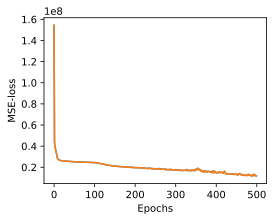

In [66]:
# Evaluating model1:
# plot history (loss curve or training curve)
pd.DataFrame(history2.history).plot(figsize=(4,3),xlabel="Epochs",ylabel="MSE-loss",legend=False);

# evaluating using MAE:
print(f"MAE loss: {tf.metrics.mae(tf.squeeze(y_test),tf.squeeze(model2.predict(X_test_p,verbose=0))).numpy()}")
